In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

loan_data = pd.read_csv('loan_dataset_final.csv')

loan_data['loan_approved'] = loan_data['loan_status'].apply(
    lambda x: 1 if x in ['Fully Paid', 'Current','Does not meet the credit policy. Status:Fully Paid'] else (0 if x in ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)','Does not meet the credit policy. Status:Charged Off'] else None)
)
loan_data = loan_data.dropna(subset=['loan_approved'])

target = 'loan_approved'
features = ['loan_amnt', 'lti','verification_status','title','term', 'annual_inc', 'emp_length', 'purpose', 'dti', 'revol_bal', 'fico_score', 'home_ownership']

X = loan_data[features]
y = loan_data[target]

X.fillna(method='ffill', inplace=True)

numeric_features = ['loan_amnt', 'annual_inc', 'dti', 'fico_score', 'revol_bal','lti']
categorical_features = ['term', 'purpose', 'home_ownership', 'emp_length', 'verification_status','title']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=5000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred, zero_division=0)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

from statsmodels.stats.proportion import proportions_ztest
n1 = n2 = 10000  

majority_class = loan_data['loan_approved'].value_counts().idxmax()

majority_class_count = loan_data['loan_approved'].value_counts().max()

total_count = loan_data['loan_approved'].count()

baseline_accuracy = majority_class_count / total_count

success1 = int(baseline_accuracy * n1)
success2 = int(accuracy * n2)

count = np.array([success1, success2])
nobs = np.array([n1, n2])
stat, pval = proportions_ztest(count, nobs)

print(f"Z-statistic: {stat:.2f}")
print(f"P-value: {pval:.2f}")

if pval < 0.05:
    print("The improvement in accuracy is statistically significant.")
else:
    print("The improvement in accuracy is not statistically significant.")


print(f"Confusion Matrix:\n{confusion}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

C:\Users\pakhi\AppData\Local\Temp\ipykernel_9260\991311237.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)


Z-statistic: -11.43
P-value: 0.00
The improvement in accuracy is statistically significant.
Confusion Matrix:
[[ 1243  1377]
 [  287 14101]]
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-Score: 0.89


<Axes: xlabel='count', ylabel='fico_score'>

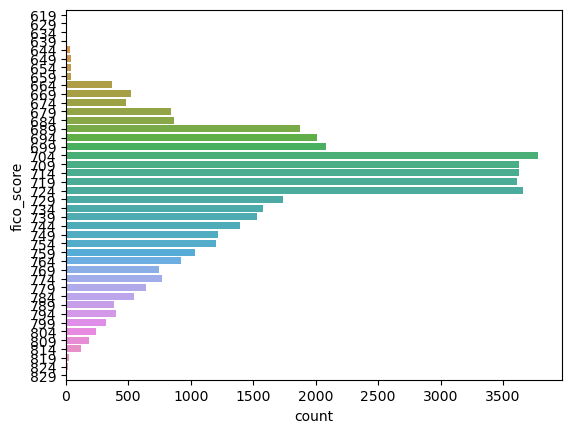

In [10]:
%matplotlib inline
sns.countplot(y='fico_score',data=loan_data)

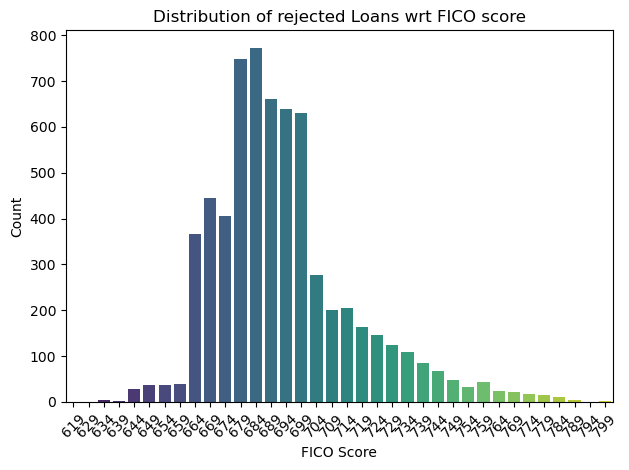

In [22]:
import matplotlib.pyplot as plt
filtered_data = loan_data[ 
                          (loan_data['loan_status'].isin(['Charged Off', 'Does not meet the credit policy. Status:Charged Off']))]
sns.countplot(x='fico_score', data=filtered_data, palette='viridis')
plt.title('Distribution of rejected Loans wrt FICO score')
plt.xlabel('FICO Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
%matplotlib inline
sns.barplot(y,X,data=loan_data)

TypeError: barplot() got multiple values for argument 'data'